In [1]:
%run ..\Functions.ipynb

In [2]:
folder=r"E:\WaPORQA\ERA5\Processed\Monthly"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds1=xr.open_mfdataset(fhs)  

folder=r"E:\WaPORQA\GEOS5\Processed\Monthly\ERA5_Grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds2=xr.open_mfdataset(fhs)  

folder=r"E:\WaPORQA\MSG\MDIDSSF\Processed\Monthly\ERA5_grid"
fhs = glob.glob(os.path.join(folder,"*.nc"))
ds3=xr.open_mfdataset(fhs)  


In [3]:
diff=ds1-ds2 #ERA5 - GEOS5
diff_ra = ds2.ra - ds3.ra #GEOS5 - MSG

In [4]:
diff

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 60)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2022-12-31
    lat        (latitude) float32 dask.array<chunksize=(321,), meta=np.ndarray>
    lon        (longitude) float32 dask.array<chunksize=(361,), meta=np.ndarray>
Data variables:
    t_air      (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>
    p_air_0    (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>
    p_air      (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>
    u          (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>
    vp         (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>
    ra         (time, latitude, longitude) float64 dask.array<chunksize=(12, 321, 361), meta=np.ndarray>

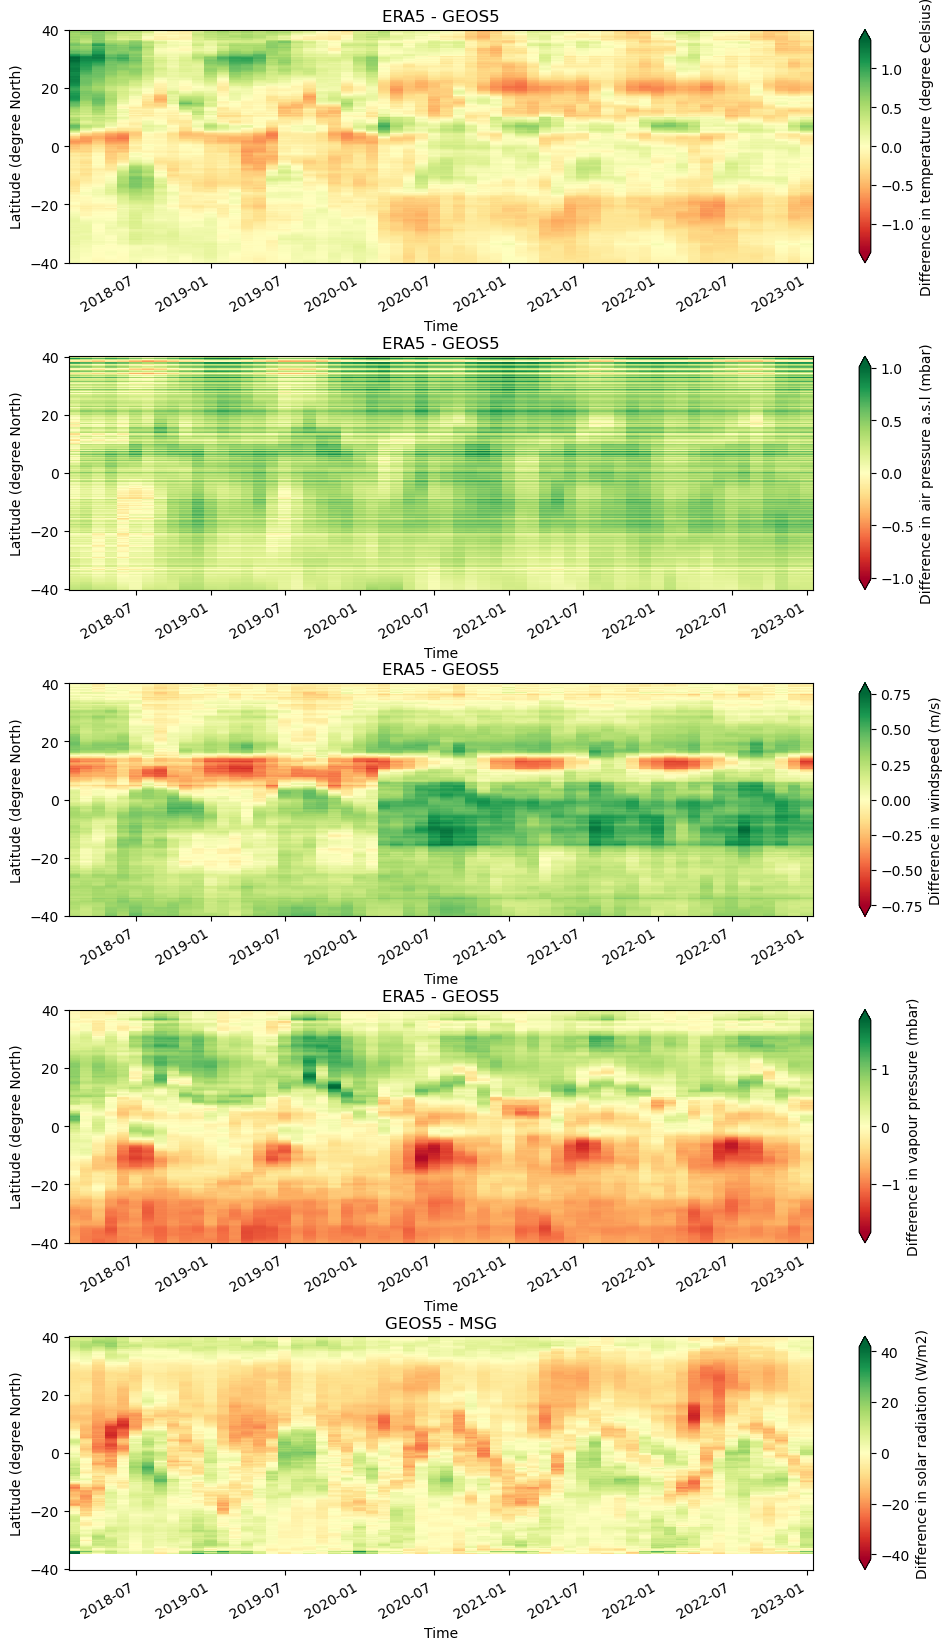

In [16]:
fig, axs = plt.subplots(5,1,figsize=(12, 20))
plt.subplots_adjust(wspace=0.1, hspace=0.4)
plot_hovmoller(diff.t_air, title = 'ERA5 - GEOS5', ax= axs[0],
               varname="Difference in temperature (degree Celsius)",
               dimension=['longitude','latitude'],
              # vmin=-3,vmax=3
              )
plot_hovmoller(diff.p_air, title = 'ERA5 - GEOS5', ax= axs[1],
               varname="Difference in air pressure a.s.l (mbar)",
               dimension=['longitude','latitude'],
               # vmin=-3,vmax=3
              )
plot_hovmoller(diff.u, title = 'ERA5 - GEOS5', ax= axs[2],
               varname="Difference in windspeed (m/s)",
               dimension=['longitude','latitude'],
               # vmin=-3,vmax=3
              )
plot_hovmoller(diff.vp, title = 'ERA5 - GEOS5', ax= axs[3],
               varname="Difference in vapour pressure (mbar)",
               dimension=['longitude','latitude'],
               # vmin=-3,vmax=3
              )
plot_hovmoller(diff_ra, title = 'GEOS5 - MSG', ax= axs[4],
               varname="Difference in solar radiation (W/m2)",
               dimension=['longitude','latitude'],
               # vmin=-3,vmax=3
              )
plt.savefig('./figures/hovmoller_diff_all_inputs_2018-2022.png',bbox_inches='tight')